### SGD Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
bos = pd.DataFrame(boston.data,columns = [boston.feature_names])
print(bos.head())

      CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX PTRATIO  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0    15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0    17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0    17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0    18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0    18.7   

        B LSTAT  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
bos['PRICE'] = boston.target
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state = 5)

### Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_data_x_train = std_scaler.fit_transform(x_train.values)
std_data_x_test = std_scaler.transform(x_test.values)

In [8]:
x_train = pd.DataFrame(std_data_x_train)
x_test = pd.DataFrame(std_data_x_test)

In [9]:
mean_value = y_train['PRICE'].mean()
y_train['PRICE'] = y_train['PRICE'].fillna(mean_value)

In [10]:
y_train['PRICE'].isnull().sum()

PRICE    0
dtype: int64

### SGD Model 

In [25]:
def gradient_descent(iterations,step_size,batch_size,x_train,y_train,lr_rate_type):

    w_init =  np.zeros((1,13))
    b_init = 0
    lr_rate = step_size
    t = 1
    power_t = 0.25
    
    optimal_w = []
    optimal_b = []
    k = 1
    for i in range(iterations):
        
        ind = np.random.choice(x_train.shape[0],batch_size,replace=False)
        x_i = x_train.iloc[ind].values
        y_i = y_train.iloc[ind].values
        
        w_init1 = np.zeros((1,13))
        b_init1 = 0
        
        for j in range(batch_size):
            error = y_i[j] - np.dot(w_init, x_i[j]) + b_init
            w_init1 += (np.multiply(x_i[j],error))
            b_init1 += (error)
        
        w_init1 *= (-2/(x_train.shape[0]))
        b_init1 *= (-2/(x_train.shape[0]))

        
        w_new = w_init - (lr_rate * w_init1)
        b_new = b_init - (lr_rate * b_init1)
        
        if lr_rate_type == 'invscaling':
            lr_rate = step_size / pow(t, power_t)
        
        ## LR_RATE_TYPE from Sklearn SGDRegressor
            
        w_init = w_new
        b_init = b_new
        k = k+1

    return w_new,b_new,k

In [26]:
opt_w,opt_b,loops = gradient_descent(1200,0.01,10,x_train,y_train,lr_rate_type='invscaling')

### Optimal W, Optimal B of SGD Model

In [27]:
print('Optimal W',opt_w.T)
print('Optimal B',opt_b[0])
print('Total no. of loops',loops)

Optimal W [[-0.74141952]
 [ 0.2213824 ]
 [-0.57364349]
 [ 0.54644303]
 [-0.38856084]
 [ 2.12151689]
 [-0.27486788]
 [-0.61939407]
 [-0.32761194]
 [-0.67078526]
 [-1.25433825]
 [ 0.62125606]
 [-2.01574218]]
Optimal B 23.234001233703694
Total no. of loops 1201


### Prediction

In [28]:
final_y = ((x_test.values).dot((opt_w).T) + opt_b[0])
print(final_y[:5])
print(y_test.head())
print(x_test.head())

[[33.09138813]
 [29.05059469]
 [27.26277586]
 [ 8.89034354]
 [33.42891215]]
    PRICE
226  37.6
292  27.9
90   22.6
373  13.8
273  35.2
         0         1         2         3         4         5         6   \
0 -0.372923 -0.502419 -0.711561 -0.256978 -0.421814  2.509379  0.675707   
1 -0.414165  3.075732 -0.898942 -0.256978 -1.231765  0.487468 -1.560575   
2 -0.412891 -0.502419 -1.129795 -0.256978 -0.552451  0.182031 -0.047275   
3  0.905605 -0.502419  1.072305 -0.256978  1.006488 -1.984712  1.154151   
4 -0.392026  0.392119 -0.597633  3.891382 -0.770180  2.008920 -0.554071   

         7         8         9         10        11        12  
0 -0.284956 -0.182270 -0.582684 -0.489550  0.318974 -1.331126  
1  0.653383 -0.641670 -0.951366  0.344640  0.427436 -1.108619  
2 -0.345867 -0.871371 -0.802704 -0.304174  0.373661 -0.526132  
3 -1.292647  1.655334  1.552100  0.808078  0.427436  3.153033  
4  0.283082 -0.756521 -1.082188  0.066577  0.357596 -0.842177  


### Mean Squared Error of SGD Model

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values,final_y)
mse

36.60437522665921

In [30]:
np.sqrt(mse)

6.050154975424944

### Plot of Actual Y vs Predicted Y of Model

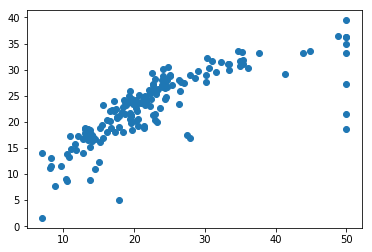

In [31]:
plt.scatter(y_test.values,final_y)

### R2 Score of SGD Model

In [32]:
from sklearn.metrics import r2_score
score = r2_score(np.array(y_test), final_y)
score

0.6095277469021806

### SGD Model of Scikit Learn

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=1200, penalty=None, eta0=0.01,learning_rate = 'invscaling',alpha=0.01)
sgd_reg.fit(x_train, y_train)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=1200, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [34]:
pred1 = sgd_reg.predict(x_test)

### R2 Score of Scikit Learn Model

In [35]:
score = r2_score(y_test.values, pred1)
score

0.6962292779651129

### Mean Squared Error of Scikit Learn Model

In [36]:
mse = mean_squared_error(np.array(y_test),pred1)
np.sqrt(mse)

5.3363507436556405

### Plot of Actual Y vs Predicted Y of Scikitlearn SGD model

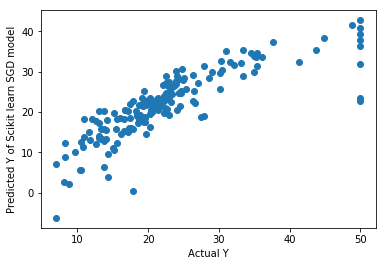

In [37]:
plt.scatter(y_test.values,pred1)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y of Scikit learn SGD model')
plt.show()

### Optimal W of Scikit learn SGD Model

In [38]:
sgd_reg.coef_

array([-1.30893904,  0.85957709, -0.16135096,  0.19539711, -1.48401279,
        2.78773606, -0.32203063, -2.77722646,  2.98195394, -2.26852175,
       -2.12969884,  1.06049332, -3.33444132])

### Optimal B of Scikit learn SGD Model

In [39]:
sgd_reg.intercept_

array([22.53739341])

### Plot of Predicted Y of SGD Model vs Predicted Y of Scikitlearn SGD model

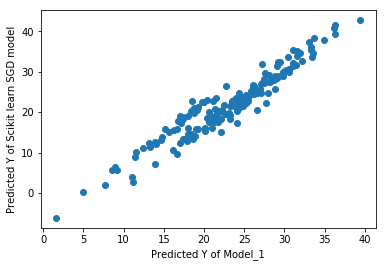

In [40]:
plt.scatter(final_y,pred1)
plt.xlabel('Predicted Y of Model_1')
plt.ylabel('Predicted Y of Scikit learn SGD model')
plt.show()